# この課題の目的
コーディング力を向上させる  
スクラッチを通してSVMを理解する

**※今回この課題に挑戦してみて、上記の2つの目的は達成できたと感じております。**

<時間的な都合で実施していない内容>  
・多項式カーネルに対応した関数は作成しておりません  
・評価（Accuracy,Recall, Precision, F1でモデルの制度をみる）  
・Scikit-learnによる実装

## データセットの用意

In [1]:
# データセットの用意
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0, 0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2)))*(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

## データを描画して見る

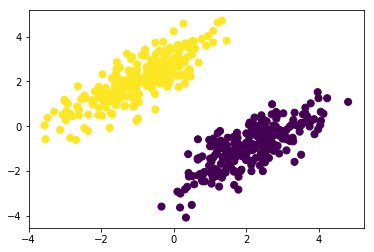

In [2]:
# データセットの理解
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, marker='o')
plt.show()

## データを分割する
ただ、この分割したデータは使わなかった

In [3]:
# テストデータの分割　学習用、検証用に分割する
# それぞれのカテゴリの割合が偏らないようにする必要がある。層別サンプリング
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y)

In [4]:
# データ型の確認
print("X.shape：",X.shape, "y.shape：",y.shape)

X.shape： (500, 2) y.shape： (500,)


In [5]:
print("X_train.shape：",X_train.shape, "y_train.shape：",y_train.shape, "X_test.shape:",X_test.shape,"y_test.shape:",y_test.shape)

X_train.shape： (400, 2) y_train.shape： (400,) X_test.shape: (100, 2) y_test.shape: (100,)


## SVM分類器のクラスを作成する

In [23]:
class ScratchSVMClassifier:
    
    # 勾配降下法でramdaを更新する
    def __init__(self, ramda, learning_rate, loop_count, threshold):
        self.ramda = ramda # ラグランジュ乗数
        self.threshold = threshold    # ラグランジュ乗数の閾値
        self.learning_rate = learning_rate # 学習率
        self.loop_count = loop_count # ループ数
        self.save = [] #サポートベクターを保管する変数 
        self.y = y # 正解ラベル


    # 勾配を求めて、ラグランジュ乗数（ラムダ：ramda）を更新する
    def gradient_desecnt(self, X, y):
        
        count = 0
        #ramda = np.random.rand(500, 1)
        
        # ラグランジュ乗数（ラムダ）を更新する
        while(count < self.loop_count):
            
            # 最初の点に対して処理を開始する
            for i in range(len(X)):
                
                # 事前計算式の結果変数を作成して、初期化しておく
                pre_calc = 0
                
                # 最初の点を自分自身を含む全ての点との処理を行う
                for j in range(len(X)):
                    
                    # jのΣ（j=1からN）をここで計算しておく
                    pre_calc = pre_calc + self.ramda[j] * y[i] * y[j] * np.dot(X[i].T, X[j])
                    
                # 計算して求まったpre_calcでラムダを更新する
                self.ramda[i] = self.ramda[i] + self.learning_rate * (1 - pre_calc)
                
                # ラグランジュ乗数（ラムダ）が0以下であれば、０に更新する
                if self.ramda[i] < 0:
                    self.ramda[i] = 0
            
            count = count + 1
            #print(count)
        return self.ramda
        
        
    # サポートベクターを保存する（fit：学習する）
    def fit(self,X, y): 
        
        # 勾配降下法でラグランジュ乗数をゲットする
        ram = self.gradient_desecnt(X, y)
        
        # ラグランジュ乗数が閾値以上のもののインデックスを抽出する
        for i, ra in enumerate(ram):
            if ra > self.threshold:
                
                # メンバー変数へ、インデックスを追加していく
                self.save.append(i)
        return self.save
    
    
    # 推定（predict）する
    def predict(self, X):
        pre_sum = 0
        for n in (self.save):
            pre_sum = pre_sum + self.ramda[n] * self.y[n] * np.dot(X, X[n].T)
            
        return pre_sum

In [24]:
# クラスから、インスタンス変数を作成する
ssvm = ScratchSVMClassifier(ramda=np.random.rand(500,1), learning_rate=0.05, loop_count=200, threshold=1e-5)

import time
# 時間計測開始
t0 = time.time()

# 学習する
ssvm.fit(X, y)

# 時間計測終了
t1 = time.time()

print("time:{}s".format(t1 - t0))


time:325.9258930683136s


In [25]:
# サポートベクトルの座標を取得
support_vec_coordinate = X[ssvm.save]

In [26]:
# サポートベクトルの個数をカウント
len(ssvm.save)

3

time:0.00047898292541503906s


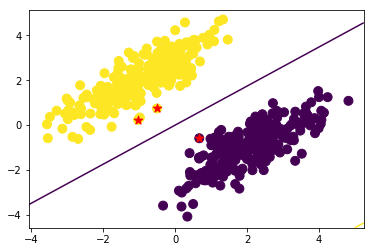

In [27]:
plt.scatter(X[:, 0], X[:, -1], s=80, c=y, marker='o')

# サポートベクトルのみプロット
plt.scatter(support_vec_coordinate[:, 0], support_vec_coordinate[:, -1], s=80, c="r", marker='*')

step = 0.1
mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, step), np.arange(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5,step))
mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]

# 時間計測開始
t0 = time.time()
pred = ssvm.predict(mesh).reshape(mesh_f0.shape)

# 時間計測終了
t1 = time.time()
print("time:{}s".format(t1 - t0))

plt.contour(mesh_f0, mesh_f1, pred, 1)
plt.show()

# 説明

## SVMとは
サポートベクトルマシン（ Support Vector Machine： SVM）は広く利用されている学習アルゴリズムの１つです。マージン（margin）を最大化することである。マージンとは、超平面（決定境界）と、この超平面に最も近いトレーニングサンプルとの間の距離として定義されます。超平面に最も近いトレーニングサンプルは**サポートベクトル（support vector）**と呼ばれます。

ポイントを以下に記載します。  
・昔流行った手法  
・計算量が多い  
・分類精度が良い  
・教師あり学習  




## SVMにおけるカーネルとは
非線形な分類でも、カーネルを使うことで可能となります。カーネルの種類は以下があります。  
・線形カーネル  
・多項式カーネル  
・RBFカーネル（ガウシアンカーネル）  
・シグモイドカーネル  


## ハードマージンSVMとソフトマージンSVMの違い
**ソフトマージン**  
過学習せずに予測ができることを汎化性といい、この汎化性を高める為に、あえて誤分類の許容を前提としたマージンをソフトマージンという。ソフトマージンは「境界線とデータはなるべく最小・誤判別は少なく」を満たす為に、以下の値を最小にするようにする。

$min((1/マージン)+C×誤判別数)$

パラメータ「 C 」というのは、誤判別をどこまで許容するかを表わします。Cが大きければ誤判別を許さず、小さいと誤判別を許容する物です。Cが無限大に大きければ、誤判別は1回も許容しないという制約になり実質ハードマージンと変わらなくなります。Cはあらかじめ決めておく必要があるハイパーパラメータです。Cは適当に決めるか、グリッドサーチなどを使用して「もっとも予測精度が高くなるようにパラメータを調節する」技術もあります。

**ハードマージン**  
「A分類」か「B分類」かをはっきり分けられることを前提としたマージンをハードマージンと呼びます。しかし、どうしても誤判別してしまうデータに対して無理やり「 100 % 正確な判別」をしてしまうと貴重な判別特徴を見失ってしまい、正しい分類規則が崩れ、予測の精度が下がってしまうことがあります。（過学習が発生しやすくなります）

<参考サイトURL>  
https://logics-of-blue.com/svm-concept/

## SVMの学習時と推定時の計算時間について
今回の学習と推定で時間を計測したところ、以下となった。圧倒的に推定（predict）の時間が短いことがわかる。学習には推論の約1,000万倍の時間が掛かっている。  

<学習>  
time:325.9258930683136s

<推論>
time:0.00047898292541503906s

## scikit-learnのGridSearchCVの役割について
ハイパーパラメータ（SVMならCや、kernelやgammaなど）を自動的に最適化してくれる機能です。ただ、計算コストが高いのでパラメータの値を慎重に考慮する必要があります。
